In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import sys
sys.path.append("/home/dux/")
sys.path.append("/home/dux/surface_sampling/mcmc")

from ase.visualize.plot import plot_atoms
from ase.build import make_supercell
from ase.io import read, write

import catkit
from catkit.gen.adsorption import get_adsorption_sites

from mcmc import mcmc_run
import os
import numpy as np

os.environ["PROJECT_DIR"] = os.getcwd()

In [16]:
# SrTiO3 from HTVS db
import sys
import os
import django
import numpy as np
# from tqdm import tqdm
# import pandas as pd
# import pickle as pkl
sys.path.append('/home/dux/htvs/')
sys.path.append('/home/dux/htvs/djangochem/')

#from imports import *
#from django_imports import *
# from pymatgen.core.periodic_table import Element
# from chemconfigs.vasp.defaults import Magmom
# from ase.visualize import view

# setup the django settings file.  Change this to use the settings file that connects you to your desired database
os.environ["DJANGO_SETTINGS_MODULE"] = "djangochem.settings.orgel"
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"  # CAUTION!!! LINE NECESSARY WHEN INTERACTING WITH DATABASE IN JUPYTER NOTEBOOK. DO NOT USE THIS LINE IF YOU ARE PLANNING ON SAVING/REMOVING THINGS FROM THE DATABASE!!!!!

# this must be run to setup access to the django settings and make database access work etc.
django.setup()
# from jobs.models import Job, JobConfig
# from django.contrib.contenttypes.models import ContentType
# from ase.io import write

from pgmols.models import Surface
# from analysis.structure.perovskite import PerovskiteAnalyzer
# from pymatgen.core.periodic_table import Element

from matplotlib import pyplot as plt 

unit_slab = Surface.objects.get(id=217485271).as_ase_gratoms()
unit_slab.write('SrTiO3_001_pristine_slab.cif')

# get supercell
# multiplier = np.diag([2, 2, 1])
# slab = make_supercell(unit_slab, multiplier)
slab = unit_slab*(2,2,1)
slab.write('SrTiO3_001_2x2_pristine_slab.cif')

pristine_slab = slab.copy()

In [17]:
pymatgen_Ti_top = [6.88719, 4.04319, 19.27625]
pymatgen_far = [7.87107, 2.61942, 19.29295]
ase_bridge = [1.96777, 1.99250, 18.59954]
ase_top = [5.90331, 0.14832, 19.49200]

In [20]:
from mcmc import filter_distances
element = 'O'

def visualize_slabs(pristine, test):
    fig, ax = plt.subplots(1, 2, figsize=(10,10))
    labels = ['pristine', 'test adsorbed']
    for i in range(2):
        ax[i].axis('off')
        ax[i].set_title(labels[i])
    plot_atoms(pristine, 
                ax[0], 
                radii=0.8, 
                rotation=("90x, 15y, 90z"))
    plot_atoms(test, 
                ax[1], 
                radii=0.8, 
                rotation=("90x, 15y, 90z"))

In [22]:
all_slabs = []

Pymatgen Ti top site

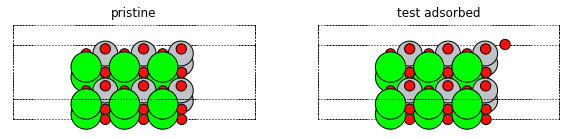

In [23]:
new_slab = pristine_slab.copy() # starting with a pristine slab

# adsorb at one site
new_slab.append(element)
new_slab.positions[-1] = pymatgen_Ti_top
all_slabs.append(new_slab)

visualize_slabs(pristine_slab, new_slab)

Pymatgen far site

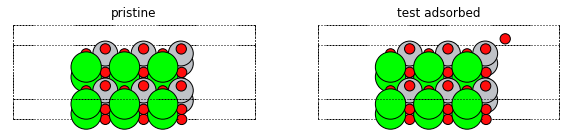

In [24]:
new_slab = pristine_slab.copy() # starting with a pristine slab

# adsorb at one site
new_slab.append(element)
new_slab.positions[-1] = pymatgen_far
all_slabs.append(new_slab)

visualize_slabs(pristine_slab, new_slab)

ASE bridge site

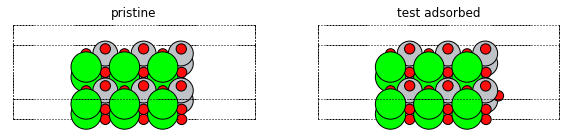

In [25]:
new_slab = pristine_slab.copy() # starting with a pristine slab

# adsorb at one site
new_slab.append(element)
new_slab.positions[-1] = ase_bridge
all_slabs.append(new_slab)

visualize_slabs(pristine_slab, new_slab)

ASE top site

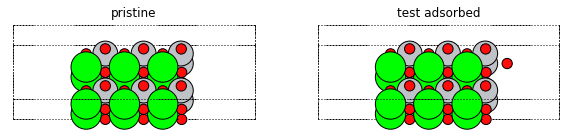

In [26]:
new_slab = pristine_slab.copy() # starting with a pristine slab

# adsorb at one site
new_slab.append(element)
new_slab.positions[-1] = ase_top
all_slabs.append(new_slab)

visualize_slabs(pristine_slab, new_slab)

In [29]:
all_slabs

[Gratoms(symbols='O37Sr12Ti12', pbc=True, cell=[7.87107526, 7.96999052, 24.83884408], surface_atoms=...),
 Gratoms(symbols='O37Sr12Ti12', pbc=True, cell=[7.87107526, 7.96999052, 24.83884408], surface_atoms=...),
 Gratoms(symbols='O37Sr12Ti12', pbc=True, cell=[7.87107526, 7.96999052, 24.83884408], surface_atoms=...),
 Gratoms(symbols='O37Sr12Ti12', pbc=True, cell=[7.87107526, 7.96999052, 24.83884408], surface_atoms=...)]

Test to ensure that the slabs indeed make sense

In [30]:
pristine_slab.get_surface_atoms()

array([ 7,  8, 14, 22, 23, 29, 37, 38, 44, 52, 53, 59])

In [31]:
surface_atoms = pristine_slab.get_surface_atoms()
atoms_arr = np.arange(0, len(pristine_slab))
base_tags = np.int8(np.isin(atoms_arr, surface_atoms)).tolist()

Set tags; 1 for surface atoms, 2 for adsorbates, 0 for others

In [32]:
for slab in all_slabs:
    num_ads_atoms = len(slab) - len(pristine_slab)
    tags = list(base_tags)
    tags.extend([2]*num_ads_atoms)
    slab.set_tags(tags)

In [33]:
for s in all_slabs:
    print(s.get_tags())
    print(f"Oxygen adsorbates are outside distance cutoffs {filter_distances(s, pristine_len=len(pristine_slab), cutoff_distance=1.5)}")

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 2]
Oxygen adsorbates are outside distance cutoffs True
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 2]
Oxygen adsorbates are outside distance cutoffs True
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 2]
Oxygen adsorbates are outside distance cutoffs True
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 2]
Oxygen adsorbates are outside distance cutoffs True


Save to .pkl

In [34]:
import pickle
print(f"slab length {len(all_slabs)}")
with open("combined_SrTiO3_001_2x2_O_ads_2022_0707_single_ads.pkl", "wb") as f:
    pickle.dump(all_slabs, f)

slab length 4
